# Ensemble Learning Methods - Higher Education Students Performance Evaluation Dataset
The assigned task is to perform Ensemble Learning Methods on provided dataset of Higher Education Students Performance Evaluation Dataset.This Dataset describes 32 attributes in which 1-10 of the data are the personal questions, 11-16. questions include family questions, and the remaining questions include education habits.
It was compiled by Dean De Cock. More details of this dataset are described in the paper: YÄ±lmaz N., Sekeroglu B. (2020) Student Performance Classification Using Artificial Intelligence Techniques. In: Aliev R., Kacprzyk J., Pedrycz W., Jamshidi M., Babanli M., Sadikoglu F. (eds) 10th International Conference on Theory and Application of Soft Computing, Computing with Words and Perceptions - ICSCCW-2019. ICSCCW 2019. Advances in Intelligent Systems and Computing, vol 1095. Springer, Cham.*
<br>


**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Import label encoder
from sklearn import preprocessing
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import svm model
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier

Attribute Information:

Student ID
1- Student Age (1: 18-21, 2: 22-25, 3: above 26)<br>
2- Sex (1: female, 2: male)<br>
3- Graduated high-school type: (1: private, 2: state, 3: other)<br>
4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)<br>
5- Additional work: (1: Yes, 2: No)<br>
6- Regular artistic or sports activity: (1: Yes, 2: No)<br>
7- Do you have a partner: (1: Yes, 2: No)<br>
8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)<br>
9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)<br>
10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)<br>
11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)<br>
12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)<br>
13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)<br>
14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)<br>
15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)<br>
16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)<br>
17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)<br>
18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)<br>
19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)<br>
20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)<br>
21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)<br>
22- Attendance to classes (1: always, 2: sometimes, 3: never)<br>
23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)<br>
24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)<br>
25- Taking notes in classes: (1: never, 2: sometimes, 3: always)<br>
26- Listening in classes: (1: never, 2: sometimes, 3: always)<br>
27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)<br>
28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)<br>
29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)<br>
30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)<br>
31- Course ID<br>
32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)<br><br><br>
Dataset LInk:<br>
https://drive.google.com/file/d/1kMPMNI62LdYjpaLQyhEsDkgoHw6c57Kt/view?usp=sharing

In [ ]:
#load data into a Python DataFrame from a .csv file
dataset=pd.read_csv('/content/DATA.csv' , delimiter = ";")
print(dataset)

     STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  \
0      STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   
1      STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   
2      STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   
3      STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   
4      STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   
..          ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
140  STUDENT141  2  1  2  3  1  1  2  1  1  ...   1   1   2   1   2   1   3   
141  STUDENT142  1  1  2  4  2  2  2  1  4  ...   1   1   3   2   2   1   5   
142  STUDENT143  1  1  1  4  2  2  2  1  1  ...   1   1   3   3   2   1   4   
143  STUDENT144  2  1  2  4  1  1  1  5  2  ...   2   1   2   1   2   1   5   
144  STUDENT145  1  1  1  5  2  2  2  3  1  ...   2   1   3   2   3   1   5   

     30  COURSE ID  GRADE  
0     1          1     

In [ ]:
#Columns Names
print('Attributes',dataset.columns)

Attributes Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')


In [ ]:
#Rename Specific Columns Name
dataset.rename(columns={'1':'Student Age','2':'Sex' , '3':'GHST','4':'ST','5':'AW','6':'RAOSA','7':'DYHP','8':'TS','9':'TU','10': 'ATC','11':' Mothersâ€™ education','12':'Fathersâ€™ education','13':'Number of sisters/brothers (if available)','14':' Parental status','15' : ' Mothersâ€™ occupation','16' :'Fathersâ€™ occupation' , '17': 'Weekly study hours' ,'18':'Reading frequency (non-scientific books/journals)', '19' :' Reading frequency (scientific books/journals)', '20' : 'Attendance to the seminars/conferences related to the department' , '21' :'Impact of your projects/activities on your success','22' :'Attendance to classes','23':' Preparation to midterm exams 1','24':'Preparation to midterm exams 2' , '25':'Taking notes in classes' , '26' : 'Listening in classes' , '27' : 'Discussion improves my interest and success in the course' , '28' :'Flip-classroom' , '29':' Cumulative grade point average in the last semester' , '30' : ' Expected Cumulative grade point average in the graduation (/4.00)'} , inplace = True)

In [ ]:
dataset

,STUDENT ID,Student Age,Sex,GHST,ST,AW,RAOSA,DYHP,TS,TU,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dataset['STUDENT ID']= label_encoder.fit_transform(dataset['STUDENT ID'])

In [ ]:
dataset.head(3)

,STUDENT ID,Student Age,Sex,GHST,ST,AW,RAOSA,DYHP,TS,TU,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,0,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,57,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,68,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1


In [ ]:
#Shape of Dataset
dataset.shape

(145, 33)

# Dataset Cleaning

**Identify the missing or null Values From Dataset**

In [ ]:
#Identify the missing or null Values From Dataset
dataset.isnull().sum()

STUDENT ID                                                            0
Student Age                                                           0
Sex                                                                   0
GHST                                                                  0
ST                                                                    0
AW                                                                    0
RAOSA                                                                 0
DYHP                                                                  0
TS                                                                    0
TU                                                                    0
ATC                                                                   0
 Mothersâ€™ education                                                 0
Fathersâ€™ education                                                  0
Number of sisters/brothers (if available)                       

In [ ]:
#info of Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   STUDENT ID                                                          145 non-null    int64
 1   Student Age                                                         145 non-null    int64
 2   Sex                                                                 145 non-null    int64
 3   GHST                                                                145 non-null    int64
 4   ST                                                                  145 non-null    int64
 5   AW                                                                  145 non-null    int64
 6   RAOSA                                                               145 non-null    int64
 7   DYHP                               

# Exploration of Dataset

In [ ]:
dataset.corr()

,STUDENT ID,Student Age,Sex,GHST,ST,AW,RAOSA,DYHP,TS,TU,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
STUDENT ID,1.000000,0.160171,0.398545,0.221898,-0.209709,0.052599,0.094844,-0.133168,-0.055747,-0.189314,...,-0.038452,-0.063142,0.021364,0.024749,0.093564,0.275393,0.274738,0.105169,-0.378735,0.384286
Student Age,0.160171,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,0.127853,0.001472,...,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.304994,-0.095251
Sex,0.398545,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.022154,-0.013313,...,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,-0.430704,0.335533
GHST,0.221898,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.126440,0.023944,...,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,-0.118761,0.104821
ST,-0.209709,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,-0.119024,0.028288,...,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.317563,0.023963
AW,0.052599,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.118284,0.102223,...,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,-0.114794,0.167445
RAOSA,0.094844,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,0.060922,0.026626,...,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.326711,-0.062993
DYHP,-0.133168,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.078556,0.037811,...,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,0.068769,-0.051778
TS,-0.055747,0.127853,-0.022154,-0.126440,-0.119024,-0.118284,0.060922,-0.078556,1.000000,-0.015926,...,0.213079,0.048955,-0.235900,-0.050648,-0.031225,-0.037184,-0.100950,-0.058644,-0.123024,-0.166352
TU,-0.189314,0.001472,-0.013313,0.023944,0.028288,0.102223,0.026626,0.037811,-0.015926,1.000000,...,-0.015048,-0.094471,0.022769,-0.019064,-0.134057,-0.158432,-0.036078,0.005909,0.114839,-0.156289


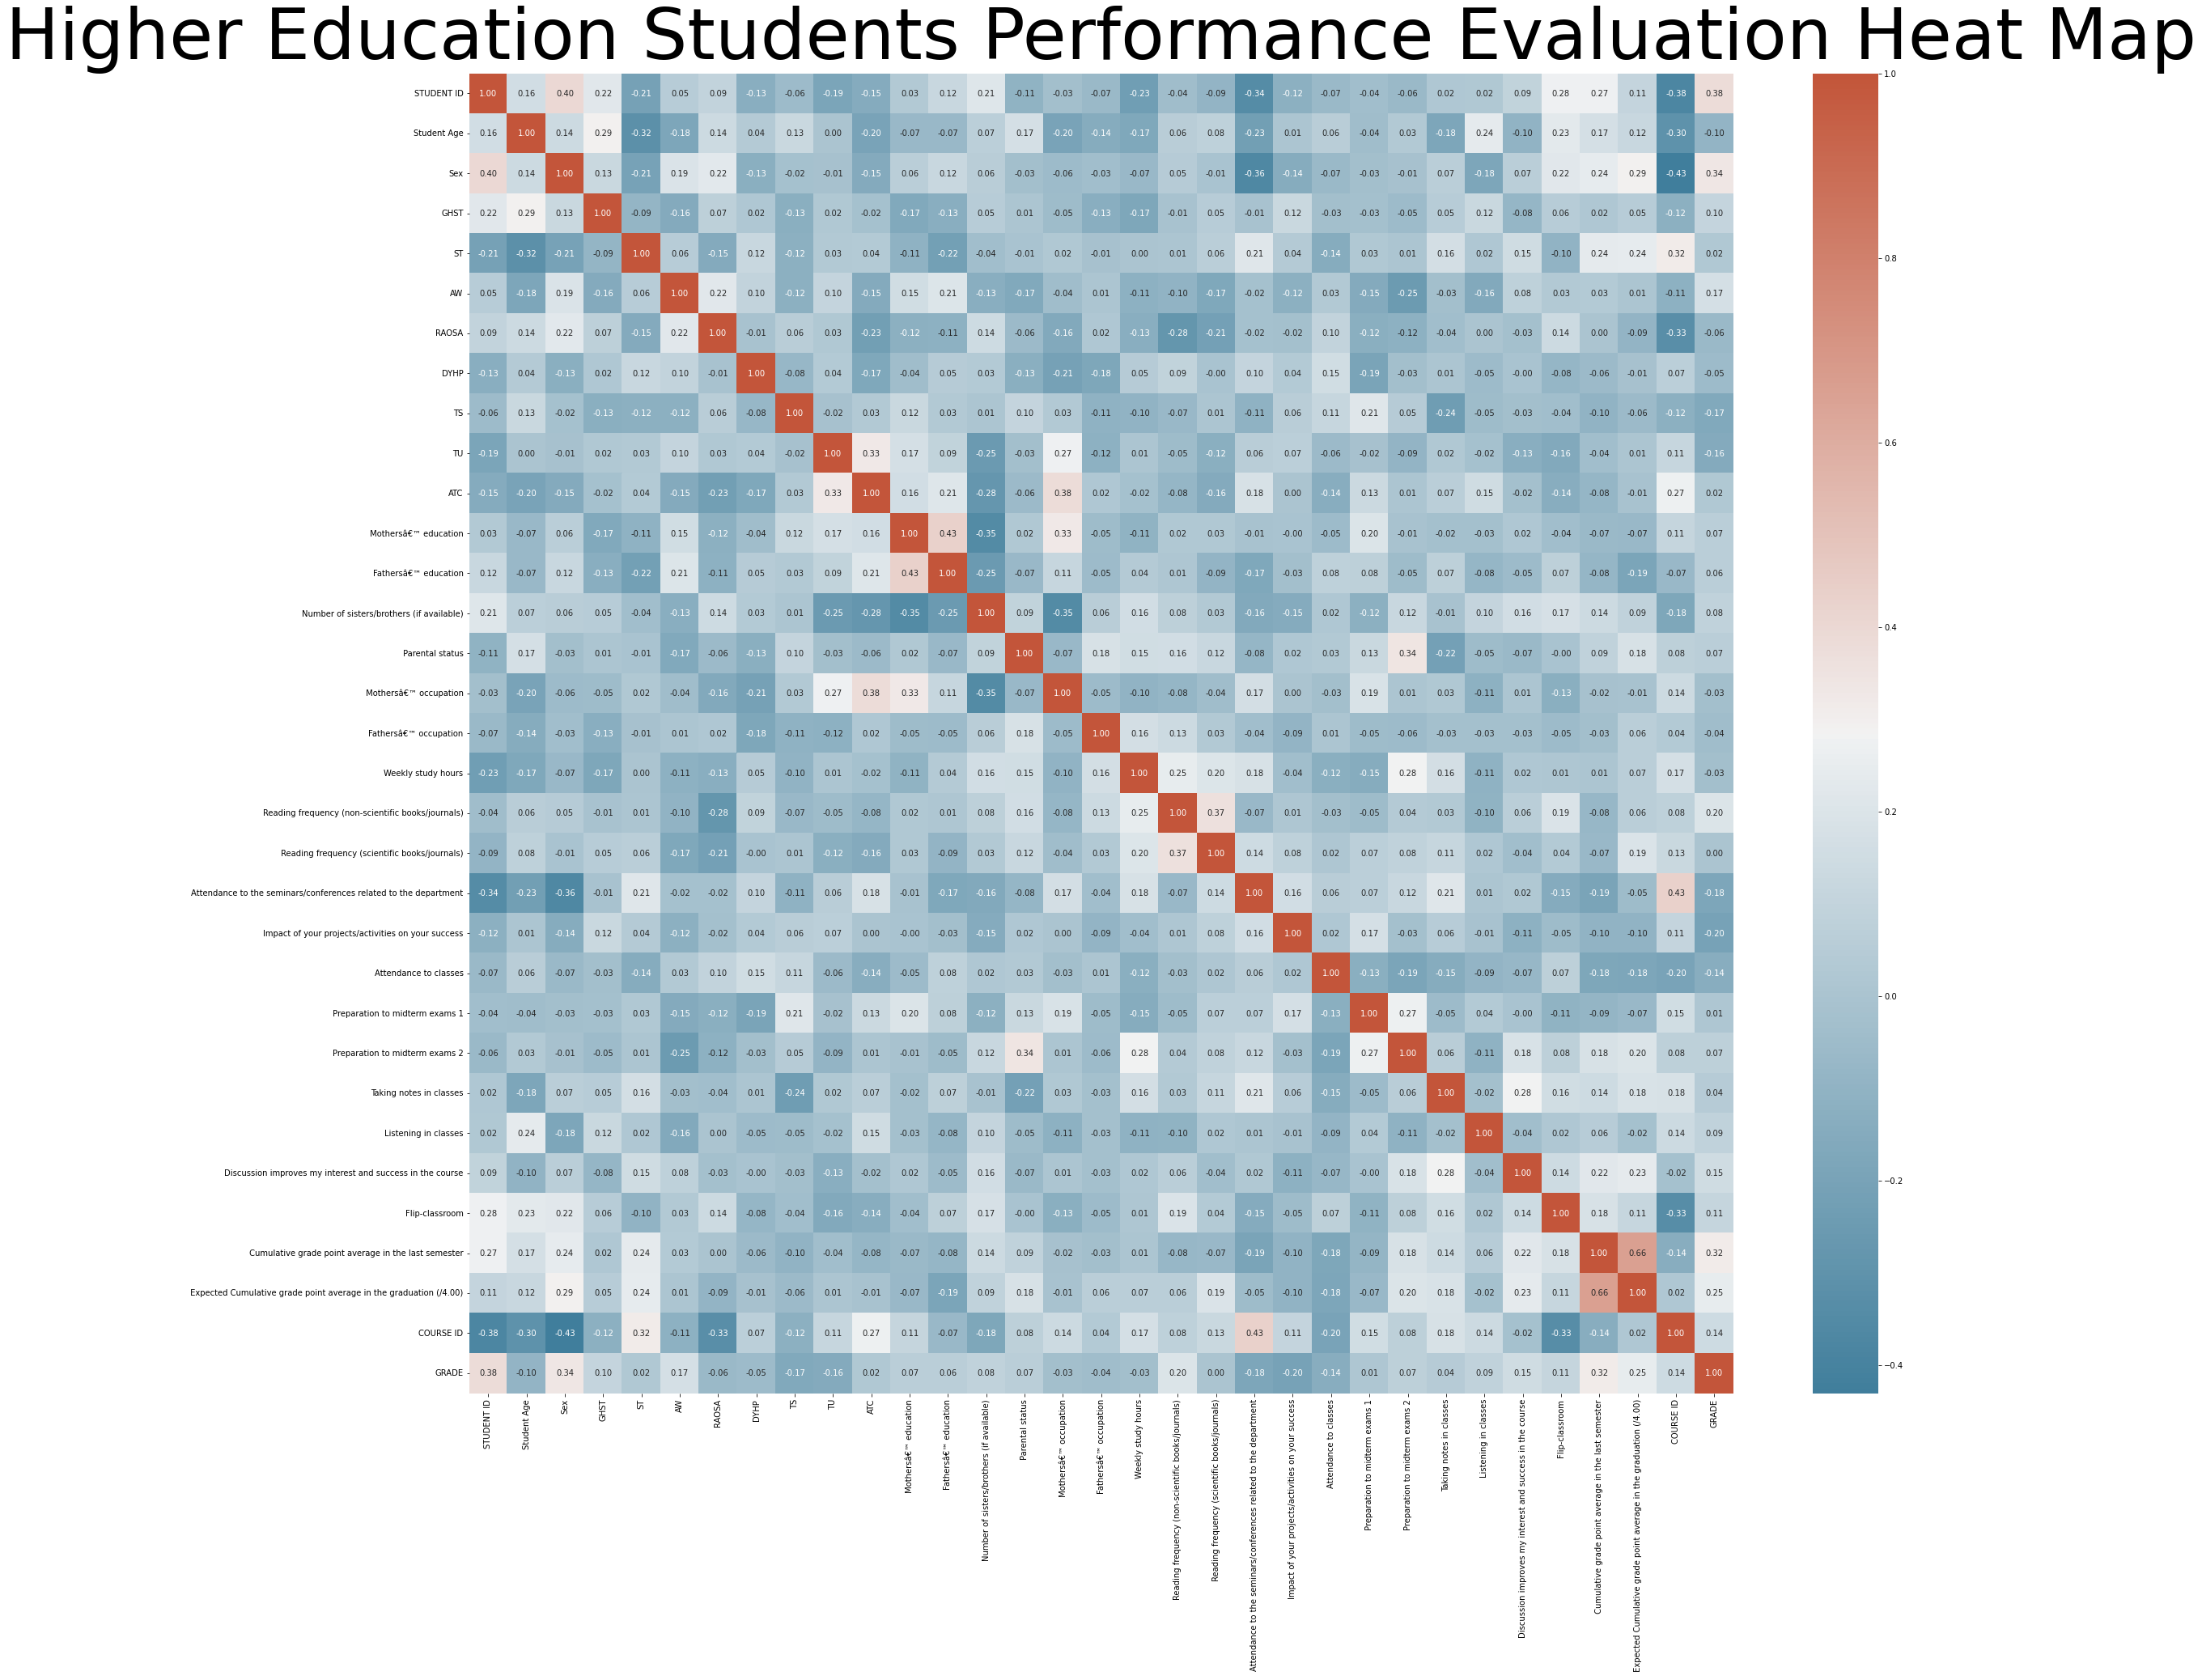

In [ ]:
#matplotlib and seaborn for visualization

plt.figure(figsize = (35,30))
# Add title to the Heat map
title = "Higher Education Students Performance Evaluation Heat Map"
# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=88)
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(dataset.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.savefig('Higher Education Students Performance Evaluation Heat Map.png') 
plt.show()

**Remove the Unnecessary Columns**

In [ ]:
# dataset.drop(columns=['STUDENT ID',' Cumulative grade point average in the last semester','Sex','TS', 'TU','Attendance to the seminars/conferences related to the department','Impact of your projects/activities on your success'])
dataset.drop(columns=['STUDENT ID','Sex','TS', 'TU','Attendance to the seminars/conferences related to the department','Impact of your projects/activities on your success'])

,Student Age,GHST,ST,AW,RAOSA,DYHP,ATC,Mothersâ€™ education,Fathersâ€™ education,Number of sisters/brothers (if available),...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,2,3,3,1,2,2,1,1,2,3,...,1,1,3,2,1,2,1,1,1,1
1,2,3,3,1,2,2,1,2,3,2,...,1,1,3,2,3,2,2,3,1,1
2,2,2,3,2,2,2,2,2,2,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,3,1,2,1,2,1,2,5,...,1,2,3,2,2,1,3,2,1,1
4,2,1,3,2,2,1,4,3,3,2,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,2,3,1,1,2,2,1,2,2,...,1,1,2,1,2,1,3,3,9,5
141,1,2,4,2,2,2,2,1,1,5,...,1,1,3,2,2,1,5,3,9,5
142,1,1,4,2,2,2,1,3,4,4,...,1,1,3,3,2,1,4,3,9,1
143,2,2,4,1,1,1,3,4,4,1,...,2,1,2,1,2,1,5,3,9,4


In [ ]:
x=dataset.drop(columns=['GRADE'], axis=1)
print(x.shape)
y=dataset['GRADE']
print(y.shape)

(145, 32)
(145,)


# Ensemble Learning Methods <br>
In this assignment, you have to implement three different Ensemble Learning Methods on any two of these models: <br>
    1)SVM <br>
    2)Logistic Regression<br>
    3)K-NN


<Figure size 432x288 with 0 Axes>

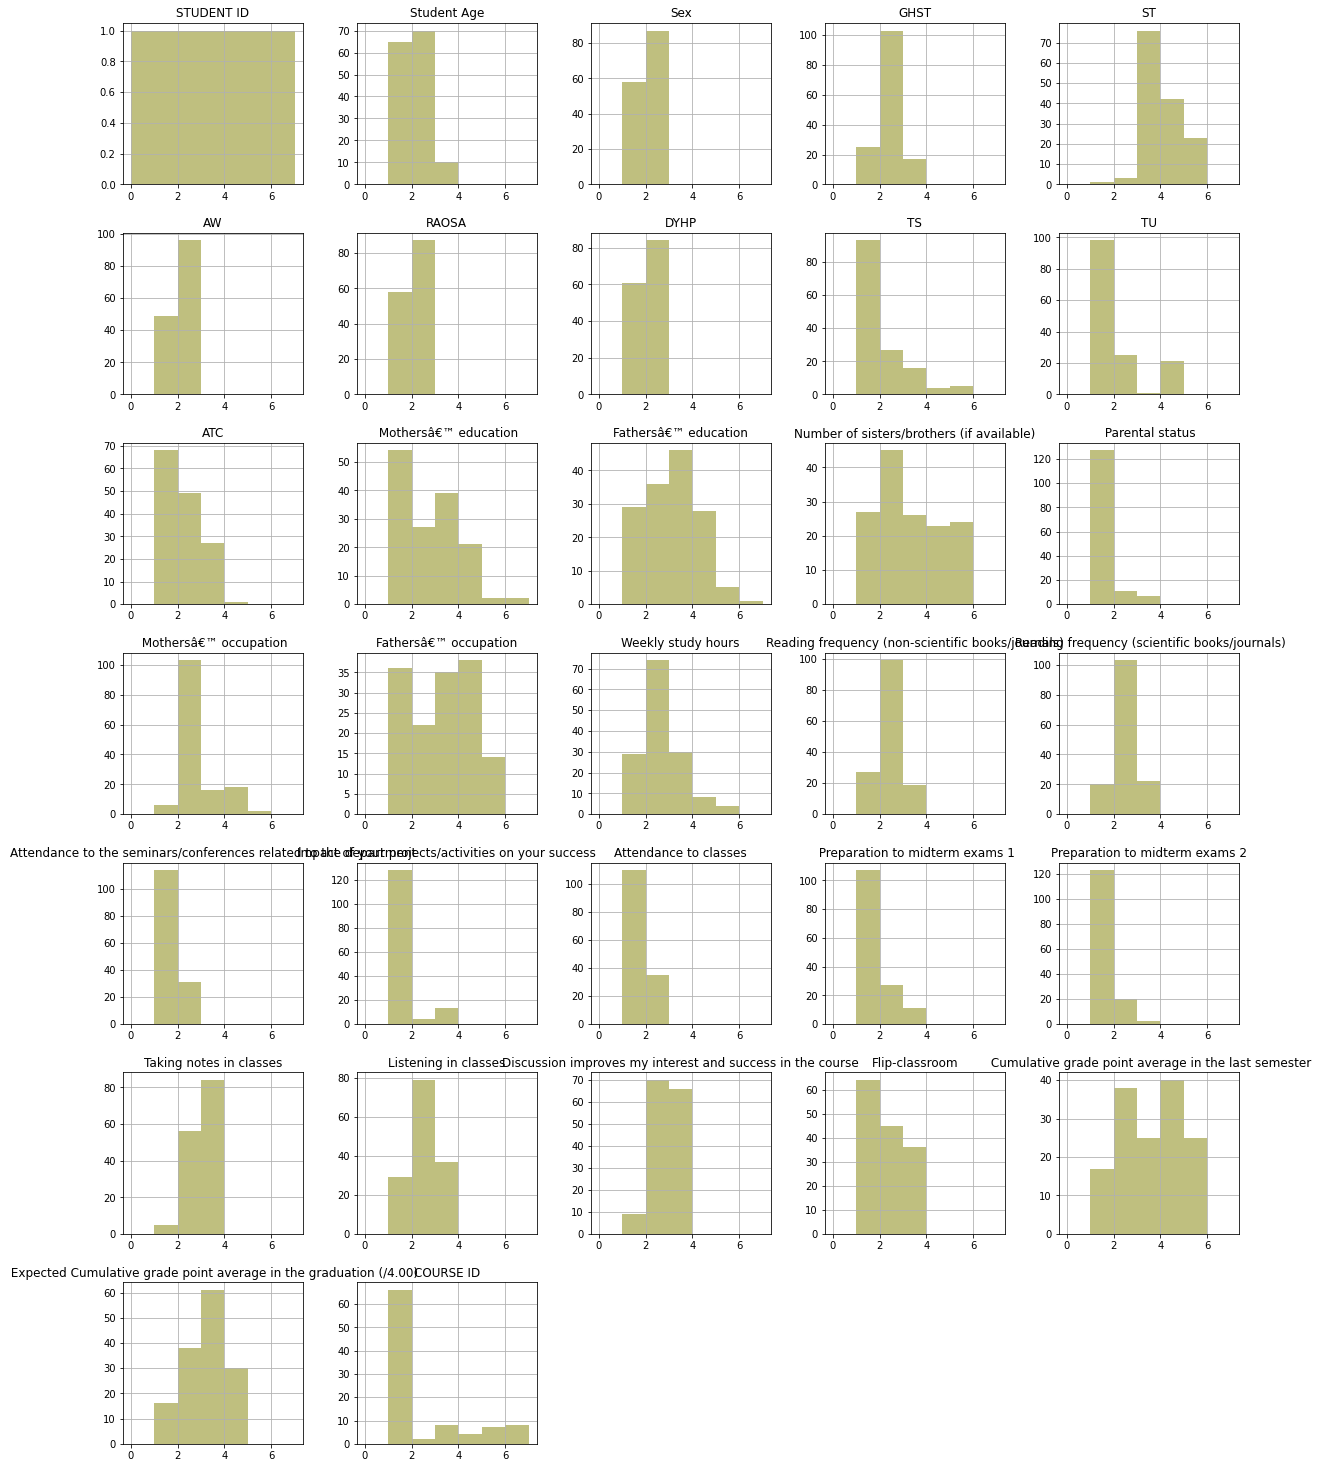

In [ ]:
# #Histrogram to show the relationship between multivariables

sorted_bins = np.sort(y)
plt.figure()
x.hist(layout=(8,5), color='olive', alpha=0.5, bins=sorted_bins, figsize=(20,30));

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(101, 32)
(44, 32)
(101,)
(44,)


**Support vector Machine** <br>

In [ ]:
#Create a svm Classifier
svm_classifier= svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_classifier_model=svm_classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_classifier.predict(X_test)
print(y_pred)
#Predict the response for train dataset
x_pred = svm_classifier.predict(X_train)
print(x_pred)

[2 3 0 7 1 1 3 7 6 2 5 2 3 2 3 3 7 6 5 1 2 1 6 7 2 2 3 2 3 3 3 3 2 4 7 5 7
 5 1 5 5 7 1 3]
[7 3 1 2 3 3 2 5 1 4 3 0 7 6 3 2 1 0 7 1 6 7 0 6 1 6 2 6 3 4 2 2 3 1 7 7 4
 0 5 1 1 7 6 2 4 1 6 2 6 7 0 2 1 0 2 1 6 3 0 6 5 5 3 2 7 1 5 1 3 0 3 1 5 3
 1 5 2 2 1 1 1 0 2 1 1 1 7 5 1 3 3 3 2 4 1 5 1 2 7 5 5]


In [ ]:
score_svm_test=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy_test:",score_svm_test)
score_svm_train=metrics.accuracy_score(y_train, x_pred)*100
print("Accuracy_train:",score_svm_train)

Accuracy_test: 15.909090909090908
Accuracy_train: 95.04950495049505


**Logistic Regression**

In [ ]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr_model=logisticRegr.fit(X_train, y_train)
print(logisticRegr_model)

LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions_Test= logisticRegr.predict(X_test)
print(predictions_Test)

[2 1 7 6 1 2 3 7 6 2 1 1 2 2 4 3 3 6 5 3 7 1 6 7 2 2 1 2 3 3 5 6 2 6 6 3 3
 6 1 5 0 7 1 3]


In [ ]:
predictions_train = logisticRegr.predict(X_train)
print(predictions_train)

[7 3 1 2 3 3 7 5 1 7 3 1 7 6 3 2 2 0 7 3 7 7 1 6 2 6 0 6 0 4 1 2 6 1 7 7 6
 0 5 1 1 7 3 2 7 1 6 2 2 6 0 2 2 2 1 3 6 2 1 7 5 6 3 2 1 3 1 1 3 0 3 1 5 3
 1 1 2 2 1 3 1 0 2 1 1 1 7 4 1 5 5 3 2 4 1 5 1 2 6 5 5]


**Calculate the accuracy of train dataset**

In [ ]:
# Use score method to get accuracy of model on train dataset
score_train = logisticRegr.score(X_train, y_train)*100
print(score_train)

62.37623762376238


**Calculate the accuracy of test dataset**

In [ ]:
# Use score method to get accuracy of model on test dataset
score_test = logisticRegr.score(X_test, y_test)*100
print(score_test)

20.454545454545457


**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_model=knn.fit(X_train, y_train)
print(knn_model)
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

KNeighborsClassifier(n_neighbors=7)
[1 2 1 6 3 2 0 6 0 2 1 3 1 7 3 7 0 7 0 2 0 1 6 6 3 1 1 7 1 1 1 5 1 6 6 1 0
 7 1 6 2 6 7 3]


**Calculate the accuracy of test dataset**

In [ ]:
# Calculate the accuracy of the model on test dataset
score_knn_test=knn.score(X_test, y_test)*100
print(score_knn_test)

27.27272727272727


**Calculate the accuracy of train dataset**

In [ ]:
# Calculate the accuracy of the model on train dataset
score_knn_train=knn.score(X_train, y_train)*100
print(score_knn_train)

42.57425742574257


In [ ]:
data={'models':['SVM' , 'IR','KNN'],'Train_dataset_accuracy':[score_svm_train,score_train,score_knn_train],'Test_dataset_accuracy':[score_svm_test,score_test,score_knn_test]}
accuracy_table=pd.DataFrame.from_dict(data)
print(accuracy_table)

  models  Train_dataset_accuracy  Test_dataset_accuracy
0    SVM               95.049505              15.909091
1     IR               62.376238              20.454545
2    KNN               42.574257              27.272727


**Vistulization Representation of Train Dataset**

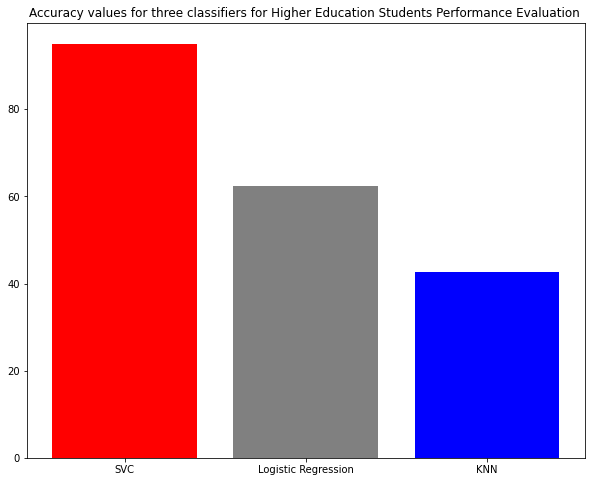

In [ ]:
fig = plt.figure(figsize=(10, 8))
bars = ['SVC', 'Logistic Regression', 'KNN']
height = [score_svm_train,score_train,score_knn_train]
x_pos = np.arange(len(bars))

plt.bar(x_pos, height,  color=['red', 'grey', 'blue'])
plt.xticks(x_pos, bars)
plt.title("Accuracy values for three classifiers for Higher Education Students Performance Evaluation ")

# Saving graph as image
plt.savefig('train_three_class.png')
plt.show()

**Vistulization Representation of Test Dataset**

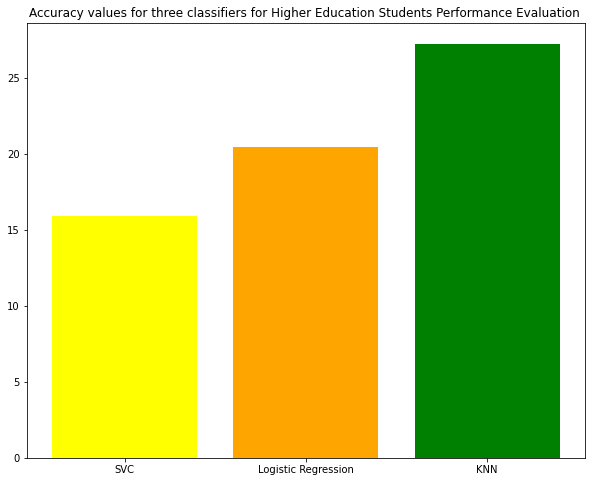

In [ ]:
fig = plt.figure(figsize=(10, 8))
bars = ['SVC', 'Logistic Regression', 'KNN']
height = [score_svm_test,score_test,score_knn_test]
x_pos = np.arange(len(bars))

plt.bar(x_pos, height,  color=['Yellow', 'Orange', 'Green'])
plt.xticks(x_pos, bars)
plt.title("Accuracy values for three classifiers for Higher Education Students Performance Evaluation ")

# Saving graph as image
plt.savefig('test_three_class.png')
plt.show()

# Ensemble learning Methods

**Bagging**

**Evaluate For SVM**

In [ ]:
bagging_classifier_algo= BaggingClassifier(base_estimator=svm_classifier_model, n_estimators=100, max_samples=0.8, bootstrap=True,oob_score=True,random_state=0)
bagging_classifier_algo.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(kernel='linear'), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

**Accuracy Score After training**

In [ ]:
train_bagging_svm=bagging_classifier_algo.oob_score_*100
print(train_bagging_svm)

21.782178217821784


** Accuracy Score of testing dataset**

In [ ]:
test_bagging_svm=bagging_classifier_algo.score(X_test, y_test)*100
print(test_bagging_svm)

29.545454545454547


**Evalate for IR**

In [ ]:
bagging_classifier_algo= BaggingRegressor(base_estimator=logisticRegr_model, n_estimators=100, max_samples=0.8, bootstrap=True,oob_score=True,random_state=0)
bagging=bagging_classifier_algo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


** Accuracy Score of train dataset**

In [ ]:
train_bagging_lr=bagging.score(X_train, y_train)*100
print(train_bagging_lr)

75.5051521042084


** Accuracy Score of testing dataset**

In [ ]:
test_bagging_lr=bagging.score(X_test, y_test)*100
print(test_bagging_lr)

10.975328684120244


**Vistulization Of Train Dataset**

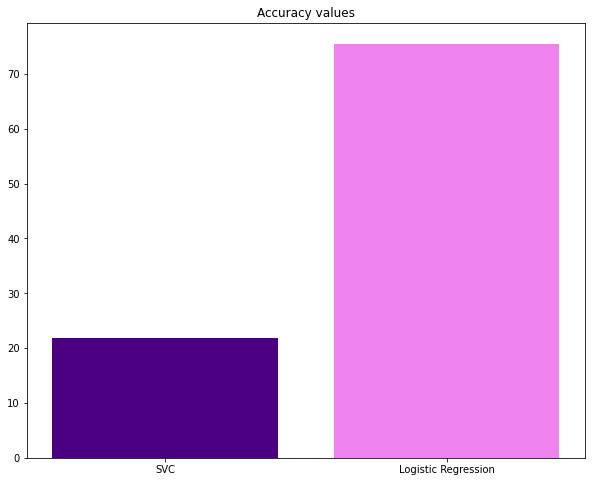

In [ ]:
fig = plt.figure(figsize=(10, 8))
bars = ['SVC', 'Logistic Regression']
height = [train_bagging_svm,train_bagging_lr]
x_pos = np.arange(len(bars))

plt.bar(x_pos, height,  color=['indigo', 'violet'])
plt.xticks(x_pos, bars)
plt.title("Accuracy values")

# Saving graph as image
plt.savefig('Bagging_train_class.png')
plt.show()

**Vistulization Of Test Dataset**

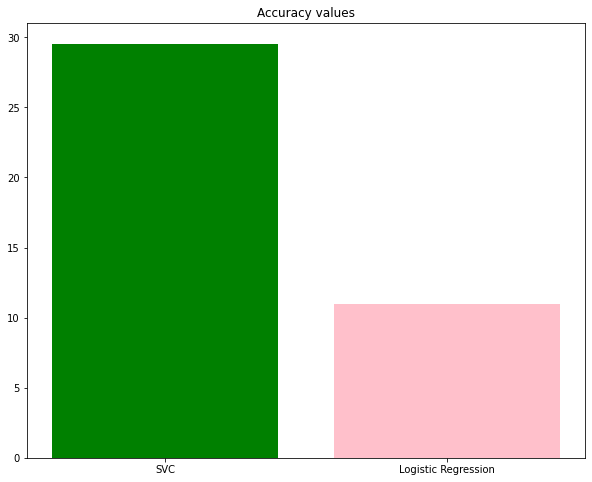

In [ ]:
fig = plt.figure(figsize=(10, 8))
bars = ['SVC', 'Logistic Regression']
height = [test_bagging_svm,test_bagging_lr]
x_pos = np.arange(len(bars))

plt.bar(x_pos, height,  color=['green', 'Pink'])
plt.xticks(x_pos, bars)
plt.title("Accuracy values")

# Saving graph as image
plt.savefig('Bagging_test_class.png')
plt.show()

**Stacking Algorithum**

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
score_svm_train,score_train,score_knn_train
models = [('lr',logisticRegr_model),('svm',svm_classifier_model),('knn',knn_model)]
stack = StackingClassifier(estimators= models)
# clf_stack =StackingClassifier(classifiers =[svm_classifier_model,score_knn_train], meta_classifier = score_train , use_probas = True, use_features_in_secondary = True)

print(stack)
stack_model=stack.fit(X_train, y_train)
print(stack_model)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('svm', SVC(kernel='linear')),
                               ('knn', KNeighborsClassifier(n_neighbors=7))])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('svm', SVC(kernel='linear')),
                               ('knn', KNeighborsClassifier(n_neighbors=7))])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Evaluate the Accuracy of Train Dataset**

In [ ]:
# predictions on train data using stacked model
pred_stack_train= stack_model.predict(X_train)       
print(pred_stack_train)
stacking_accuracy_train=accuracy_score(pred_stack_train,y_train)*100
print('Accuracy=',stacking_accuracy_train)

[6 1 2 1 2 4 3 1 0 7 7 0 6 6 3 0 2 1 6 1 5 5 0 5 1 7 1 6 7 7 2 1 7 1 7 7 5
 0 6 1 1 7 0 1 4 2 5 1 0 7 1 1 1 0 0 1 6 7 0 6 6 6 7 1 7 1 2 2 1 7 1 2 6 4
 1 5 1 1 1 1 0 1 1 1 2 1 7 1 1 1 3 3 1 1 1 1 2 1 5 6 5]
Accuracy= 36.633663366336634


**Evaluate the Accuracy of Test Dataset**

In [ ]:
pred_stack_test = stack_model.predict(X_test)       # predictions on test data using stacked model
print(pred_stack_test)
stacking_accuracy_test=accuracy_score(pred_stack_test,y_test)*100
print('Accuracy=',stacking_accuracy_test)

[1 1 0 7 1 1 3 3 7 1 1 2 1 7 3 7 3 5 3 1 2 2 6 6 1 0 3 0 3 1 4 3 1 7 6 2 7
 5 1 6 3 5 2 3]
Accuracy= 22.727272727272727


**Boosting Algorithum**

**For Classification Of SVM)**

In [ ]:
model = svm_classifier_model
modelsvm=model.fit(X_train, y_train)
#Evaluate for traing Dataset
train_svm_boost=modelsvm.score(X_train, y_train)*100
#Evaluate for test dataset
test_svm_boost=modelsvm.score(X_test,y_test)*100
print('Accuracy of Train=',train_svm_boost)
print('Accuracy of Test=',test_svm_boost)

Accuracy of Train= 95.04950495049505
Accuracy of Test= 15.909090909090908


**For Classification Of knn**

In [ ]:
model = knn_model
modelknn=model.fit(X_train, y_train)
#Evaluate for traing Dataset
train_knn_boost=modelknn.score(X_train, y_train)*100
#Evaluate for test dataset
test_knn_boost=modelknn.score(X_test,y_test)*100
print('Accuracy of Train=',train_knn_boost)
print('Accuracy of Test=',test_knn_boost)

Accuracy of Train= 42.57425742574257
Accuracy of Test= 27.27272727272727


**For Regression**

In [ ]:
model = logisticRegr_model
modellr=model.fit(X_train, y_train)
#Evaluate for traing Dataset
train_lr_boost=modellr.score(X_train, y_train)*100
#Evaluate for test dataset
test_lr_boost=modellr.score(X_test,y_test)*100
print('Accuracy of Train=',train_lr_boost)
print('Accuracy of Test=',test_lr_boost)

Accuracy of Train= 62.37623762376238
Accuracy of Test= 20.454545454545457


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Vistulization Of Train Dataset**

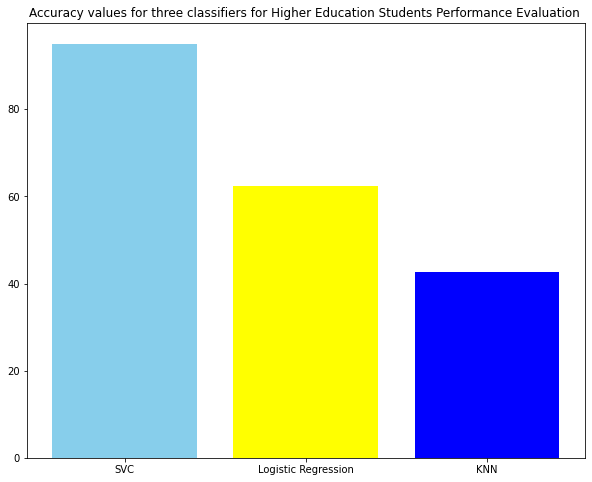

In [ ]:
fig = plt.figure(figsize=(10, 8))
bars = ['SVC', 'Logistic Regression', 'KNN']
height = [train_svm_boost,train_lr_boost,train_knn_boost]
x_pos = np.arange(len(bars))

plt.bar(x_pos, height,  color=['skyblue', 'yellow', 'blue'])
plt.xticks(x_pos, bars)
plt.title("Accuracy values for three classifiers for Higher Education Students Performance Evaluation ")

# Saving graph as image
plt.savefig('train_Boosting_class.png')
plt.show()

**Vistulization Of Test Dataset**

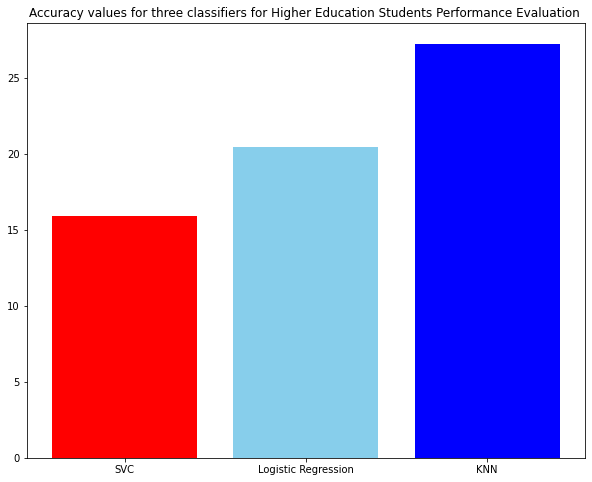

In [ ]:
fig = plt.figure(figsize=(10, 8))
bars = ['SVC', 'Logistic Regression', 'KNN']
height = [test_svm_boost,test_lr_boost,test_knn_boost]
x_pos = np.arange(len(bars))

plt.bar(x_pos, height,  color=['red', 'skyblue', 'blue'])
plt.xticks(x_pos, bars)
plt.title("Accuracy values for three classifiers for Higher Education Students Performance Evaluation ")

# Saving graph as image
plt.savefig('test_boosting_class.png')
plt.show()